<h1 style="font-size:240%; color:blue; text-align:center; line-height:45px;"> 4. RUIDO SPECKLE Y FILTRADO</h1>

<p style="font-size:135%;">Imagenes de prueba y función de ruido Speckle</p>

In [1]:
from matplotlib import pyplot as plt
from IPython.display import Image
import numpy as np
import cv2
import math
import time
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='crarojasca', api_key='0TgPUaFsSObByh4UJKQ1')

def speckleNoise(image, alfa):
    row,col = image.shape
    gauss = np.random.randn(row,col)
    gauss = gauss.reshape(row,col)        
    noisy = image + image * gauss * alfa
    return noisy
        
img=list()
speckle=[]    
    
img.append(cv2.imread("Figures/Lenna.png"))

img[0] = cv2.cvtColor(img[0], cv2.COLOR_BGR2GRAY)
speckle.append(speckleNoise(img[0],0.1))

plt.figure(1)
plt.subplots_adjust(left=0.0, right=1.5, bottom=0.0, top=1.5)
plt.subplot(121) ,plt.imshow(img[0], cmap='gray')
plt.title('Lenna')
plt.subplot(122) ,plt.imshow(speckle[0], cmap='gray')
plt.title('Speckle Noise')


img.append(cv2.imread("Figures/Half.png"))
img[1] = cv2.cvtColor(img[1], cv2.COLOR_BGR2GRAY)
speckle.append(speckleNoise(img[1],0.1))

plt.figure(2)
plt.subplots_adjust(left=0.0, right=1.5, bottom=0.0, top=1.5)
plt.subplot(121) ,plt.imshow(img[1], cmap='gray')
plt.title('Chess')
plt.subplot(122) ,plt.imshow(speckle[1], cmap='gray')
plt.title('Speckle Noise')
plt.show()

<h1 style="font-size:210%; color:blue; text-align:center; line-height:45px;"> 1. Filtrado de Ruido Speckle</h1>

<h1 style="font-size:180%; color:blue; text-align:left; line-height:45px;"> 1.1. Filtro Lee </h1>

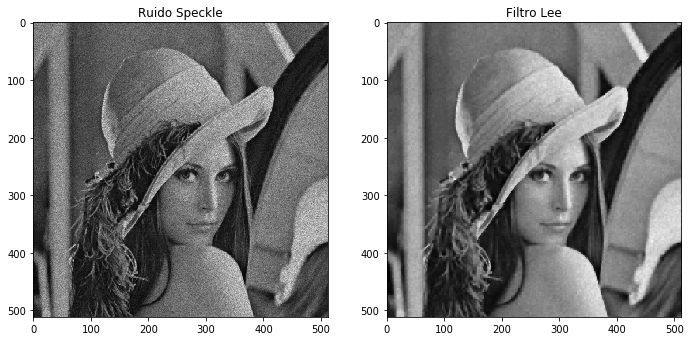

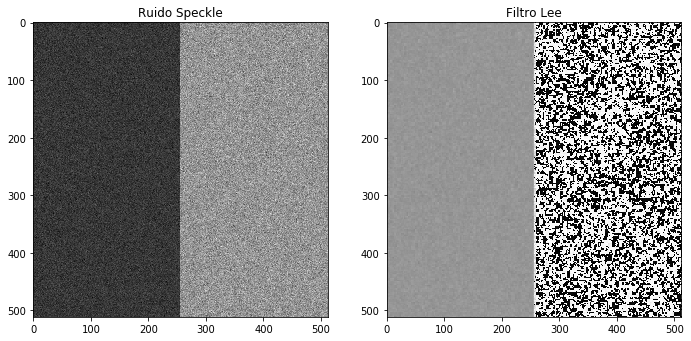

In [2]:
from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.measurements import variance

def lee_filter(img, n):
    
    h = img.shape[0]
    w = img.shape[1]
    
    img_output = np.zeros((h, w), np.uint8)
    for x in range(0, h, n):
        for y in range(0, w, n):
            block = img[x:x+n,y:y+n]
            block_mean = uniform_filter(block, (n, n))
            block_sqr_mean = uniform_filter(block**2, (n, n))
            block_variance = block_sqr_mean - block_mean**2

            overall_variance = variance(img)

            block_weights = block_variance**2 / (block_variance**2 + overall_variance**2)
            block_output = block_mean + block_weights * (block - block_mean)
            
            img_output[x:x+n,y:y+n] = block_output
    return img_output


leeImg = list()  

for i in range(len(img)):  
    leeImg.append(lee_filter(speckle[i], 6))
    plt.figure(i)
    plt.subplots_adjust(left=0.0, right=1.5, bottom=0.0, top=1.5)
    plt.subplot(121) ,plt.imshow(speckle[i], cmap='gray')
    plt.title('Ruido Speckle')
    plt.subplot(122) ,plt.imshow(leeImg[i], cmap='gray')
    plt.title('Filtro Lee')
    plt.show()



<h1 style="font-size:180%; color:blue; text-align:left; line-height:45px;"> 1.2. Filtro Kuan </h1>

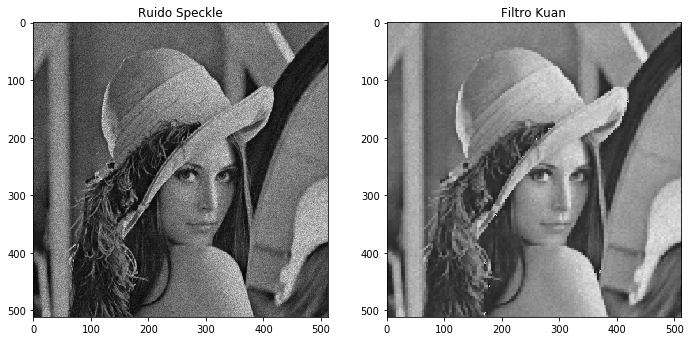

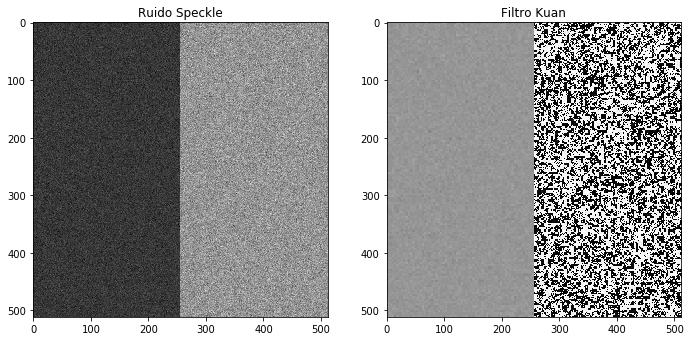

In [38]:
def kuan_filter(img, n, L):
    
    h = img.shape[0]
    w = img.shape[1]
    
    img_output = np.zeros((h, w), np.uint8)
    for x in range(0, h, n):
        for y in range(0, w, n):
            block = img[x:x+n,y:y+n]
            block_median = np.median(block)
            block_variance = block.var()
            noise_variance = (L*block_variance - block_median**2)/(L+1)
            block_output = block_median + (noise_variance*(block-block_median))/(noise_variance+(block_variance+noise_variance)/L)
            img_output[x:x+n,y:y+n] = block_output
    return img_output
  



kuanImg = list()  

for i in range(len(img)):  
    kuanImg.append(kuan_filter(speckle[i], 4, 0.2))
    plt.figure(i)
    plt.subplots_adjust(left=0.0, right=1.5, bottom=0.0, top=1.5)
    plt.subplot(121) ,plt.imshow(speckle[i], cmap='gray')
    plt.title('Ruido Speckle')
    plt.subplot(122) ,plt.imshow(kuanImg[i], cmap='gray')
    plt.title('Filtro Kuan')
    plt.show()

<h1 style="font-size:180%; color:blue; text-align:left; line-height:45px;"> 1.3. Filtro Oddy </h1>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: RuntimeWarning:

invalid value encountered in ulong_scalars



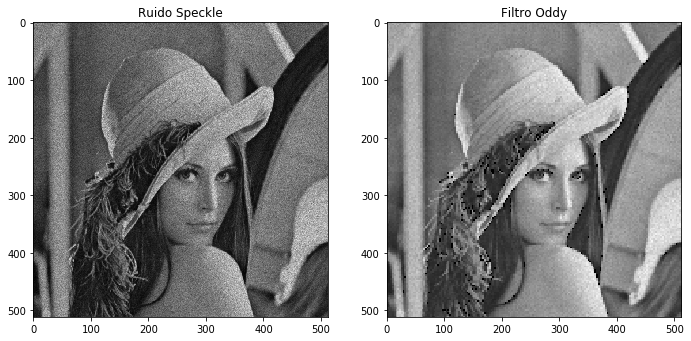

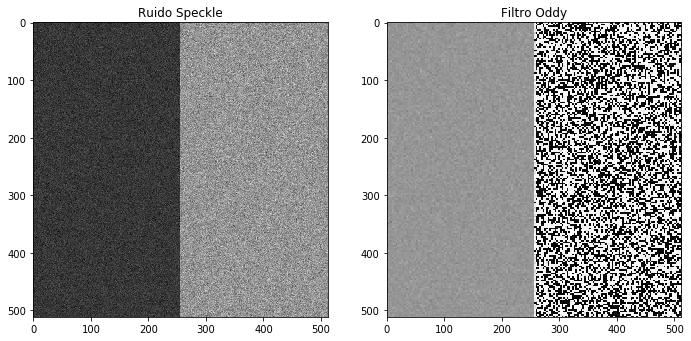

In [4]:
def oddy_filter(img, n, alfa):
    h = img.shape[0]
    w = img.shape[1]
    
    img_output = np.zeros((h, w), np.uint8)
    for x in range(0, h, n):
        for y in range(0, w, n):            
            block = img[x:x+n,y:y+n]
            block_median = np.median(block)
            m = (1/8)*np.sum(block-block_median)
            if m < alfa*block_median:                
                img_output[x:x+n,y:y+n] = block_median
            else:
                W = np.zeros((n, n), np.uint8)
                for i in range(0,n-1):
                    for j in range(0,n-1):
                        if block[i,j]<=m:
                            W[i,j]=1
                        else:
                            W[i,j]=0
                img_output[x:x+n,y:y+n] = np.sum(W*y)/np.sum(W)
    return img_output
  
oddyImg = list()  

for i in range(len(img)):  
    oddyImg.append(oddy_filter(speckle[i], 3, 0.2))
    plt.figure(i)
    plt.subplots_adjust(left=0.0, right=1.5, bottom=0.0, top=1.5)
    plt.subplot(121) ,plt.imshow(speckle[i], cmap='gray')
    plt.title('Ruido Speckle')
    plt.subplot(122) ,plt.imshow(oddyImg[i], cmap='gray')
    plt.title('Filtro Oddy')
    plt.show()

<h1 style="font-size:210%; color:blue; text-align:center; line-height:45px;"> 2. Técnicas de
Estimación del Nivel de Ruido </h1>

<h1 style="font-size:180%; color:blue; text-align:left; line-height:45px;"> 2.1. Relación señal a ruido </h1>

In [5]:
def SNR(img):
    return np.median(img)/img.var()

print(SNR(kuanImg[0]))

0.057374361864549625


<h1 style="font-size:180%; color:blue; text-align:left; line-height:45px;"> 2.2. Número equivalente de vistas </h1>

In [6]:
def ENL(img, window):
    return np.median(img[window[0]:window[1]])/img[window[2]:window[3]].var()

print(ENL(kuanImg[0],[420,430,345,350]))

0.05066079038476669


<h1 style="font-size:180%; color:blue; text-align:left; line-height:45px;"> 2.3. Indice de supresión de speckle </h1>

In [7]:
def SSI(img, flt):
    return math.sqrt(flt.var())/np.median(flt) * np.median(img)/math.sqrt(img.var())

print(SSI(speckle[0],kuanImg[0]))

0.94234726801858


<h1 style="font-size:180%; color:blue; text-align:left; line-height:45px;"> 2.4. Indice de preservado de la media y supresión del ruido speckle </h1>

In [8]:
def SMPI(img, flt):
    return (1 + abs(np.median(img)-np.median(flt)))*(math.sqrt(flt.var())/math.sqrt(img.var()))

print(SMPI(speckle[0],kuanImg[0]))

2.146295662188871


<h1 style="font-size:180%; color:blue; text-align:left; line-height:45px;"> 2.5. Indice de mejoría de los contornos (EEI). </h1>

In [9]:
def Qfactor(img, flt, enl):
    ys = np.median(img) - abs(np.median(img) - np.median(flt))
    return ys**2/(enl*flt.var()**2)

print(Qfactor(speckle[0],kuanImg[0],ENL(kuanImg[0],[420,430,345,350])))


0.06245372390976978


<h1 style="font-size:210%; color:blue; text-align:center; line-height:45px;"> 3. Evaluación de desempeño </h1>

<h1 style="font-size:180%; color:blue; text-align:left; line-height:45px;"> 3.1. FIltro Lee </h1>

In [29]:


leeInd = list()
for i in range(len(leeImg)):
    tmp = list()
    tmp.append(SNR(leeImg[i]))
    tmp.append(ENL(leeImg[i],[420,430,345,350]))
    tmp.append(SSI(speckle[i],leeImg[i]))
    tmp.append(SMPI(speckle[i],leeImg[i]))
    tmp.append(Qfactor(speckle[0],leeImg[0],ENL(leeImg[0],[420,430,345,350])))
    leeInd.append(tmp)
leeInd = [list(i) for i in zip(*leeInd)]
leeIndT = np.around(leeInd,3)
trace = go.Table(
    header=dict(values=['SNR', 'ENL', 'SSI', 'SMPI', 'Qfactor'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                font = dict(color = 'black', size = 18),
                align = ['center'],
                height = 30),
    cells=dict(values=leeIndT,
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               font = dict(color = 'black', size = 18),
               align = ['left'] * 5,
               height = 30))

layout = dict(width=900, height=300)
data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename = 'styled_table')



# trace_women = Bar(x=df.School,
#                   y=df.Women,
#                   name='Women',
#                   marker=dict(color='#ffcdd2'))

# trace_men = Bar(x=df.School,
#                 y=df.Men,
#                 name='Men',
#                 marker=dict(color='#A2D5F2'))

# trace_gap = Bar(x=df.School,
#                 y=df.Gap,
#                 name='Gap',
#                 marker=dict(color='#59606D'))

# data = [leeInd[0], trace_men, trace_gap]
# layout = Layout(title="Average Earnings for Graduates",
#                 xaxis=dict(title='School'),
#                 yaxis=dict(title='Salary (in thousands)'))
# fig = Figure(data=data, layout=layout)

# py.iplot(fig, sharing='secret', filename='jupyter/styled_bar')

In [41]:
print(SNR(kuanImg[i]))

0.02051118098746869


<h1 style="font-size:180%; color:blue; text-align:left; line-height:45px;"> 3.2. FIltro Kuan </h1>

In [44]:
kuanInd = list()
for i in range(len(kuanImg)):
    tmp = list()
    tmp.append(SNR(kuanImg[i]))    
    tmp.append(ENL(kuanImg[i],[420,430,345,350]))
    tmp.append(SSI(speckle[i],kuanImg[i]))
    tmp.append(SMPI(speckle[i],kuanImg[i]))
    tmp.append(Qfactor(speckle[i],kuanImg[i],ENL(kuanImg[i],[420,430,345,350])))
    kuanInd.append(tmp)
    
kuanInd = [list(i) for i in zip(*kuanInd)]
kuanInd = np.around(kuanInd,3)
trace = go.Table(
    header=dict(values=['SNR', 'ENL', 'SSI', 'SMPI', 'Qfactor'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                font = dict(color = 'black', size = 18),
                align = ['center'],
                height = 30),
    cells=dict(values=kuanInd,
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               font = dict(color = 'black', size = 18),
               align = ['left'] * 5,
               height = 30))

layout = dict(width=900, height=300)
data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename = 'styled_table')

<h1 style="font-size:180%; color:blue; text-align:left; line-height:45px;"> 3.2. FIltro Oddy </h1>

In [45]:
oddyInd = list()
for i in range(len(oddyImg)):
    tmp = list()
    tmp.append(SNR(oddyImg[i]))
    tmp.append(ENL(oddyImg[i],[420,430,345,350]))
    tmp.append(SSI(speckle[i],oddyImg[i]))
    tmp.append(SMPI(speckle[i],oddyImg[i]))
    tmp.append(Qfactor(speckle[0],oddyImg[0],ENL(oddyImg[0],[420,430,345,350])))
    oddyInd.append(tmp)

oddyInd = [list(i) for i in zip(*oddyInd)]
oddyInd = np.around(oddyInd,3)
trace = go.Table(
    header=dict(values=['SNR', 'ENL', 'SSI', 'SMPI', 'Qfactor'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                font = dict(color = 'black', size = 18),
                align = ['center'],
                height = 30),
    cells=dict(values=oddyInd,
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               font = dict(color = 'black', size = 18),
               align = ['left'] * 5,
               height = 30))

layout = dict(width=900, height=300)
data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename = 'styled_table')